In [1]:
import pandas as pd
df = pd.read_csv('c:/data/coin/market-price.csv', index_col=0)
df

,market-price
Timestamp,
2022-04-08 00:00:00,43464.32
2022-04-09 00:00:00,42278.94
2022-04-10 00:00:00,42787.69
2022-04-11 00:00:00,42144.23
2022-04-12 00:00:00,39488.62
...,...
2022-06-03 00:00:00,30429.88
2022-06-04 00:00:00,29681.76
2022-06-05 00:00:00,29845.23


<AxesSubplot:xlabel='Timestamp'>

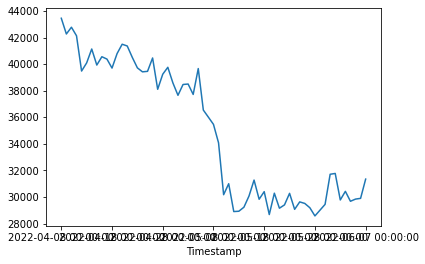

In [2]:
df['market-price'].plot()


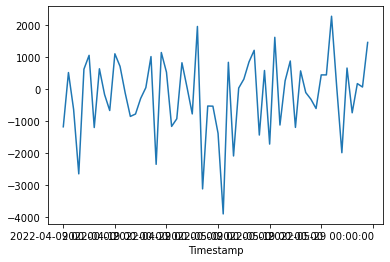

In [3]:
# 1차 차분 데이터
import matplotlib.pyplot as plt
diff1=df['market-price'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# 로그 후 차분한 자료를 함수로 안정적인 시계열인지 확인
diff1=np.log(df['market-price']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함 안정적인 시계열 자료임)


(-9.7446605293367, 8.317516905202188e-17, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, -177.8887001442032)
ADF Statistic: -9.744661
p-value: 0.000000


In [5]:
from pmdarima.arima import auto_arima
model = auto_arima(df['market-price'],suppress_warnings=True)
model
# arima(1,1,0) 

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# 학습용, 검증용 구분
n=int(df.shape[0]*.8)
train = df[:n]
test = df[n:]
print(len(df['market-price']))
print(train['market-price'].values)
print(test['market-price'].values)


61
[43464.32 42278.94 42787.69 42144.23 39488.62 40102.2  41148.06 39939.9
 40566.2  40388.78 39711.45 40805.72 41507.3  41375.79 40514.01 39727.65
 39429.01 39465.57 40472.7  38114.94 39249.28 39770.04 38596.28 37661.19
 38475.48 38510.65 37727.19 39674.89 36549.9  36013.03 35471.42 34082.21
 30175.71 31003.93 28907.15 28931.14 29234.06 30074.61 31277.43 29834.09
 30406.69 28680.97 30289.87 29159.5  29409.92 30278.94 29074.33 29634.57]
[29518.59 29193.92 28578.89 29013.69 29448.74 31715.58 31776.27 29780.81
 30429.88 29681.76 29845.23 29901.35 31349.82]


In [7]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['market-price'], order=(2,1,1)).fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [8]:
#예측값
fore = model.forecast(steps=5)
print(fore)
# 예측값, stderr, upper bound, lower bound

2022-05-26    29570.300064
2022-05-27    29587.315360
2022-05-28    29584.874501
2022-05-29    29585.416068
2022-05-30    29585.328674
Freq: D, Name: predicted_mean, dtype: float64


In [9]:
a = model.forecast(steps=len(test))
plt.plot(df['market-price'], label='Actuals')
plt.plot(a, label='Forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['market-price'], order=(2,1,1)).fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
fore = model.forecast(steps=5)
print(fore)


(array([29190.04392415, 28789.25581028, 28684.55869169, 28193.66913224,
       28083.1693117 ]), array([1145.45162923, 1429.94906907, 1647.68080883, 1910.23539245,
       2068.78233106]), array([[26944.99998482, 31435.08786347],
       [25986.60713517, 31591.90448539],
       [25455.16364837, 31913.95373501],
       [24449.67656105, 31937.66170343],
       [24028.43045096, 32137.90817244]]))


c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


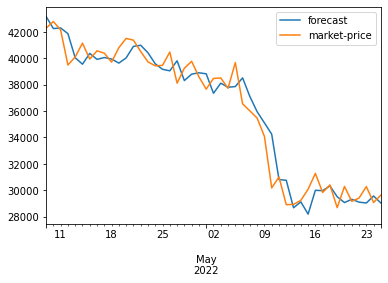

In [ ]:
model.plot_predict()
plt.show()

[29518.59 29193.92 28578.89 29013.69 29448.74 31715.58 31776.27 29780.81
 30429.88 29681.76 29845.23 29901.35 31349.82]
[29190.04392415 28789.25581028 28684.55869169 28193.66913224
 28083.1693117  27631.01393642 27474.01753425 27066.58256824
 26869.80156711 26496.58829547 26270.83067438 25921.96609225
 25675.82559705]


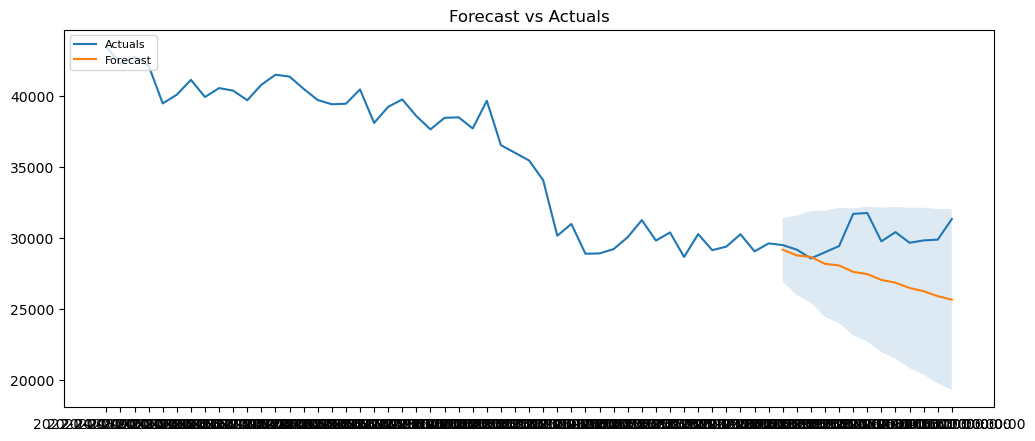

In [ ]:
fc, se, conf = model.forecast(steps=len(test))
print(test['market-price'].values)
print(fc)
fc_series = pd.Series(fc,index=test.index)
lower = pd.Series(conf[:, 0],index=test.index)
upper = pd.Series(conf[:, 1],index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['market-price'], label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()